In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import struct
import pickle
from models import *
import importlib 

In [5]:
def load_mnist_images(filename):
    with open(filename, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack('>IIII', f.read(16))
        images = np.frombuffer(f.read(), dtype=np.uint8)
        images = images.reshape(num_images, rows, cols)
    return images

# Reads the MNIST label file and returns a NumPy array with the labels.
def load_mnist_labels(filename):
    with open(filename, 'rb') as f:
        magic, num_labels = struct.unpack('>II', f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

# Load train set
train_images = load_mnist_images('./mnist/train-images.idx3-ubyte')
train_labels = load_mnist_labels('./mnist/train-labels.idx1-ubyte')
# Load test set
test_images = load_mnist_images('./mnist/t10k-images.idx3-ubyte')
test_labels = load_mnist_labels('./mnist/t10k-labels.idx1-ubyte')

In [6]:
print(f"Training Images Shape {train_images.shape}")
print(f"Training Labels Shape {train_labels.shape}")
print(f"Test Images Shape {test_labels.shape}")
print(f"Test Labels Shape {test_labels.shape}")

Training Images Shape (60000, 28, 28)
Training Labels Shape (60000,)
Test Images Shape (10000,)
Test Labels Shape (10000,)


In [7]:
# Putting the data in a best-known format.
# Train set
X = train_images
X = X.reshape(-1,28*28)
Y = train_labels
Y = Y.reshape(-1,1)

# Test set
X_test = test_images
X_test = X_test.reshape(-1,28*28)
Y_test = test_labels
Y_test = Y_test.reshape(-1,1)

In [8]:
print(X.shape)
print(Y.shape)
print(X_test.shape)
print(Y_test.shape)


(60000, 784)
(60000, 1)
(10000, 784)
(10000, 1)


In [9]:
def onehot_coder_notebook(Y):
    n_classes = np.max(Y) + 1
    y_hot = np.eye(n_classes,dtype=int)[Y]
    return y_hot.squeeze()

In [10]:
initializer = initialize_parameters(input_size=784, hidden_layer1_size=50, hidden_layer2_size=20 , output_size=10)
print(initializer)

{'W1': array([[ 0.00611867,  0.00668491,  0.002774  , ..., -0.01396734,
         0.01406571,  0.01644526],
       [-0.00018418, -0.00035903, -0.00711566, ...,  0.00519422,
        -0.00523997, -0.01016879],
       [-0.0077428 ,  0.00543818,  0.00155778, ...,  0.00209983,
        -0.00550708, -0.00384554],
       ...,
       [ 0.00174155,  0.01521025, -0.01202209, ...,  0.00539065,
        -0.02164193, -0.00873344],
       [-0.0171554 ,  0.0031728 , -0.00813689, ...,  0.0037725 ,
        -0.0091885 ,  0.02805024],
       [-0.01593614, -0.00099584,  0.0016059 , ..., -0.00194731,
         0.01426779,  0.0087209 ]]), 'b1': array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]]), 'W2': array([[ 2.09364846e-03, -8.86714596e-03, -1.20842893e-02,
        -3.32149247e-03, -1.14344985e-02, -1.16383195e-02,
         1.202

In [16]:
def train_notebook(X,Y,input_size, hidden_layer1_size, hidden_layer2_size, output_size, learning_rate, epochs, batch_size, weights):
    #Inputs Data
    m = X.shape[0]
    Y = onehot_coder_notebook(Y)
    cost = []
    epoch_list = []

    for epoch in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        Y_shuffled = Y[indices]

        # Using Mini-Batch:
        for i in range(0,m,batch_size):
            #Batch Sample
            X_batch = X_shuffled[i:i+batch_size] #i + batch_size - i = batch_size
            Y_batch = Y_shuffled[i:i+batch_size]
            # Forward propagation with the batch sample
            forward_data = forward_prop(X_batch,weights)
            # Perform backpropagation
            gradients = backward_prop(X_batch,Y_batch,forward_data,weights)
            # Update weights
            weights = update_weights(weights,gradients,learning_rate)

        #Calculate cost for each iterations:
        forward_data_full = forward_prop(X,weights)
        _,_,_,_,_, A3 = forward_data_full
        epoch_cost = compute_cost(A3,Y)
        #Print cost for each multiple of 10 epoch count:
        if epoch % 10 == 0:
            print(f'Epoch {epoch},cost: {epoch_cost}')
            cost.append(epoch_cost)
            epoch_list.append(epoch)
    
    return weights,cost,epoch_list

In [17]:
X_norm = X/ 255
model1,cost1,epoch_list_1 = train_notebook(X_norm,Y,input_size=784, hidden_layer1_size=50, hidden_layer2_size=20 ,output_size=10,learning_rate=0.005, epochs=100, batch_size=60000,weights=initializer)

Epoch 0,cost: 3.1461331600906868
Epoch 10,cost: 3.111598291897451
Epoch 20,cost: 3.0950950787678826
Epoch 30,cost: 3.1137251946435254
Epoch 40,cost: 3.1124424054438014
Epoch 50,cost: 3.1996391294010915
Epoch 60,cost: 3.1204991637962776
Epoch 70,cost: 3.1341670207179697
Epoch 80,cost: 3.092356829691172
Epoch 90,cost: 3.1406373716043063


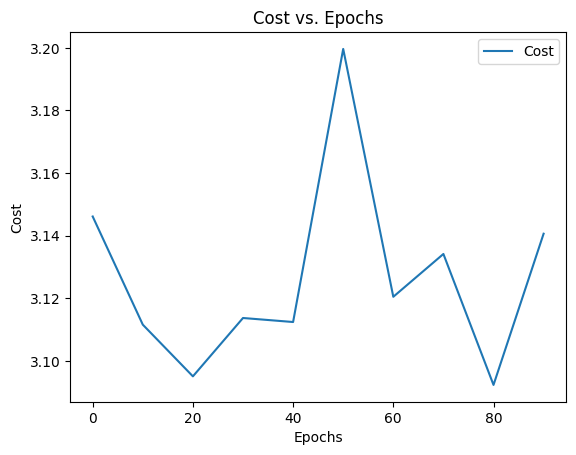

In [23]:
plt.plot(epoch_list_1,cost1, label="Cost")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Cost vs. Epochs")
plt.legend()
plt.show()

In [25]:
model2,cost2,epoch_list_2 = train_notebook(X,Y,input_size=784, hidden_layer1_size=50, hidden_layer2_size=20 ,output_size=10,learning_rate=0.005, epochs=100, batch_size=60000,weights=initializer)

Epoch 0,cost: nan
Epoch 10,cost: nan
Epoch 20,cost: nan
Epoch 30,cost: nan
Epoch 40,cost: nan
Epoch 50,cost: nan
Epoch 60,cost: nan
Epoch 70,cost: nan
Epoch 80,cost: nan
Epoch 90,cost: nan


In [ ]:
model = train_notebook(X,Y,input_size=784, hidden_layer1_size=50, hidden_layer2_size=20 ,output_size=10,learning_rate=0.005, epochs=100, batch_size=61,weights=initializer)


Epoch 0,cost: 0.2955622183221679
Epoch 10,cost: 0.06989340523943696


/Users/khnguyen/Dev/DigitRecognition/models.py:86: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * np.sum(Y * np.log(AL) + (1-Y) * np.log(1-AL))
/Users/khnguyen/Dev/DigitRecognition/models.py:86: RuntimeWarning: invalid value encountered in multiply
  cost = -1/m * np.sum(Y * np.log(AL) + (1-Y) * np.log(1-AL))


Epoch 20,cost: nan
Epoch 30,cost: nan
Epoch 40,cost: nan


KeyboardInterrupt: 